In [1]:
import pandas as pd

In [2]:
# Load Data
df = pd.read_csv("./data/play_tennis.csv", sep=",")

In [3]:
df.head(14)

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [4]:
# Convert categorical features to numeric
# The remaining columns in the df are retained.
categorical_features = ['outlook', 'temp', 'humidity', 'wind']
df1 = pd.get_dummies(df, columns = categorical_features)
df1.head(3)

,day,play,outlook_Overcast,outlook_Rain,outlook_Sunny,temp_Cool,temp_Hot,temp_Mild,humidity_High,humidity_Normal,wind_Strong,wind_Weak
0,D1,No,0,0,1,0,1,0,1,0,0,1
1,D2,No,0,0,1,0,1,0,1,0,1,0
2,D3,Yes,1,0,0,0,1,0,1,0,0,1


In [5]:
# Transform output columns
df1['play'] = df1['play'].map({'No': 0, 'Yes':1})
df1

,day,play,outlook_Overcast,outlook_Rain,outlook_Sunny,temp_Cool,temp_Hot,temp_Mild,humidity_High,humidity_Normal,wind_Strong,wind_Weak
0,D1,0,0,0,1,0,1,0,1,0,0,1
1,D2,0,0,0,1,0,1,0,1,0,1,0
2,D3,1,1,0,0,0,1,0,1,0,0,1
3,D4,1,0,1,0,0,0,1,1,0,0,1
4,D5,1,0,1,0,1,0,0,0,1,0,1
5,D6,0,0,1,0,1,0,0,0,1,1,0
6,D7,1,1,0,0,1,0,0,0,1,1,0
7,D8,0,0,0,1,0,0,1,1,0,0,1
8,D9,1,0,0,1,1,0,0,0,1,0,1
9,D10,1,0,1,0,0,0,1,0,1,0,1


In [6]:
features_df = df1.drop(['day','play'],axis=1)
labels_df = df1['play']

In [7]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=4)


In [8]:
decision_tree.fit(features_df, labels_df)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

C:\Users\raghu\Anaconda3\envs\ml_basics\lib\site-packages\sklearn\externals\six.py:28: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  warnings.warn("The module is deprecated in version 0.21 and will be removed "


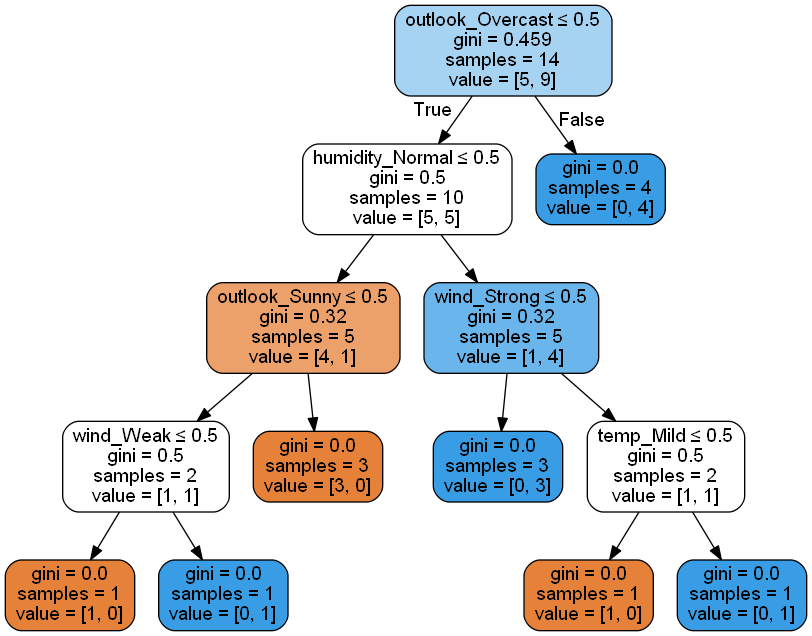

In [9]:
# Display Graph

from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

# String Buffer
dot_data = StringIO()

# Export model info into the string buffer
export_graphviz(decision_tree, out_file=dot_data, filled=True, 
               rounded=True, special_characters=True, feature_names=list(features_df.columns))

# create graph from the string buffer data
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Visualize 
Image(graph.create_png())